# QFT

In [1]:
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import QFT

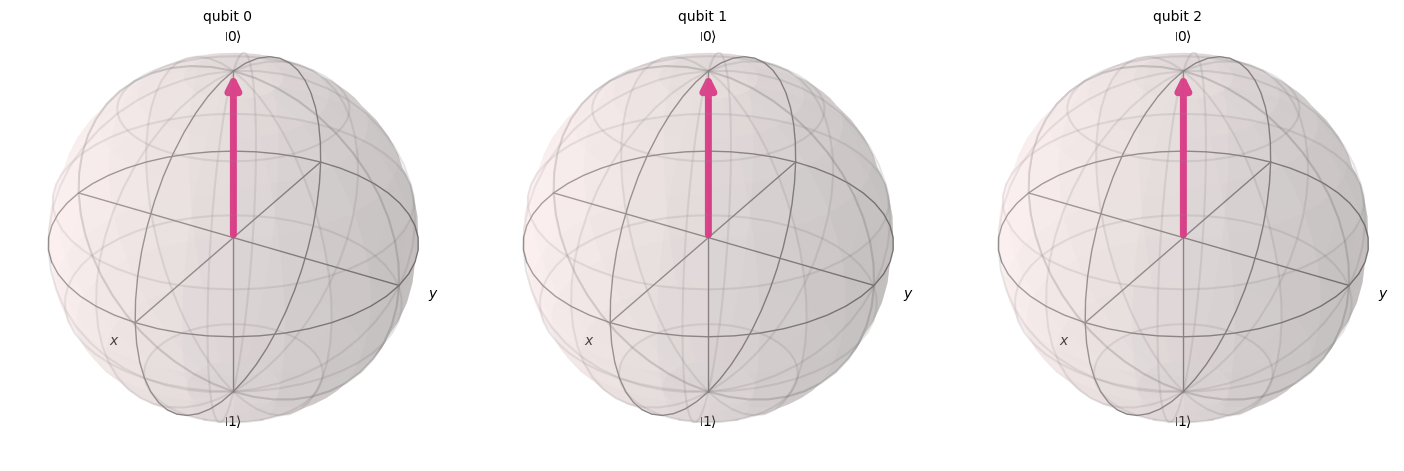

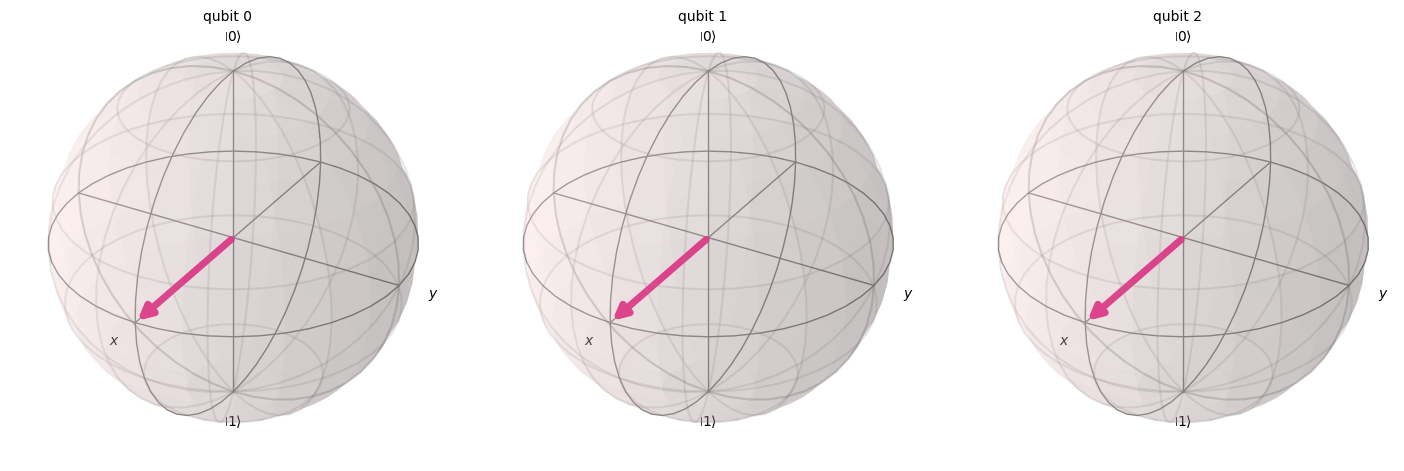

In [2]:
state = 0 # a basis state
psi = Statevector.from_int(state, 2**3) # 3 qubits
psi_qft = psi.evolve(QFT(3)) # 3 qubits QFT 

display(psi.draw('bloch'))
display(psi_qft.draw('bloch'))

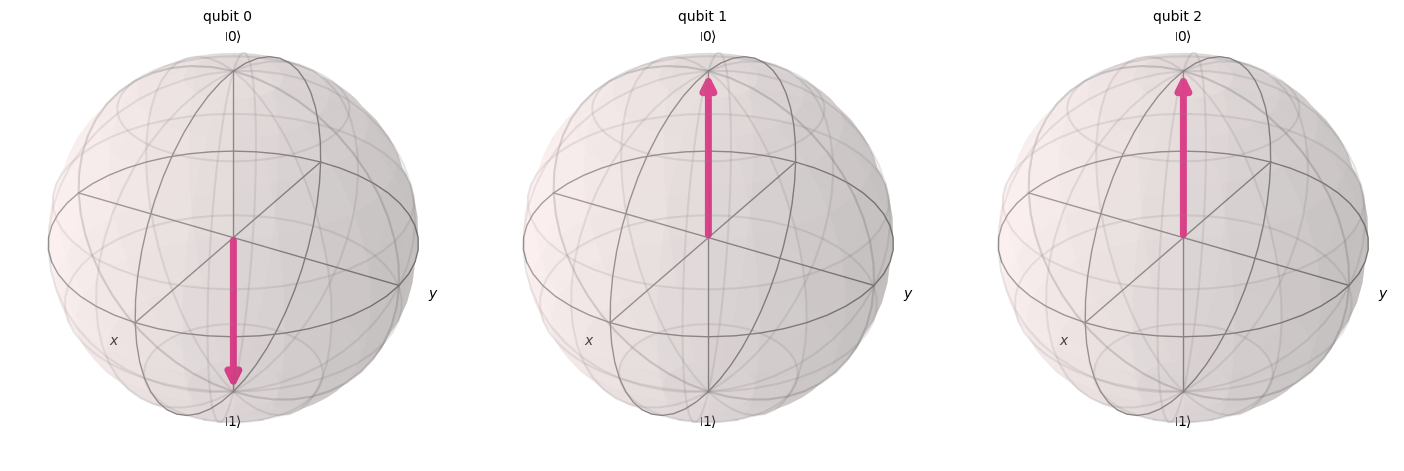

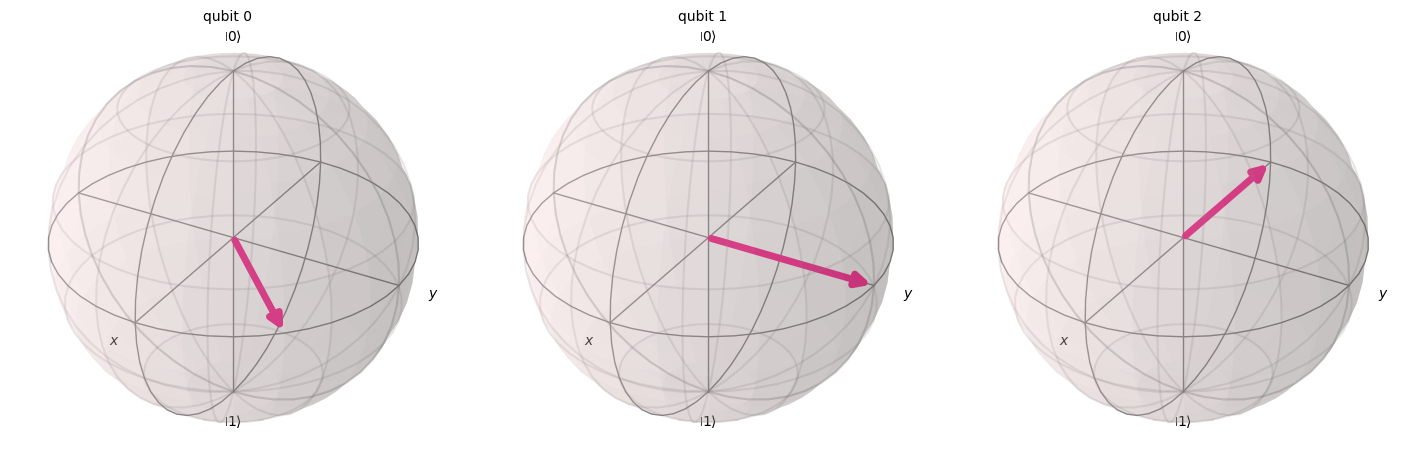

In [3]:
state = 1 # a basis state
psi = Statevector.from_int(state, 2**3) # 3 qubits
psi_qft = psi.evolve(QFT(3)) # 3 qubits QFT 

display(psi.draw('bloch'))
display(psi_qft.draw('bloch'))

$\ket{000} \xrightarrow{\text{QFT}} \ket{+++}$

$\ket{100} \xrightarrow{\text{QFT}}$ the first qubit rotate by $\frac{\pi}{4}$, the second by $\frac{\pi}{2}$ and the third by $\pi$.  

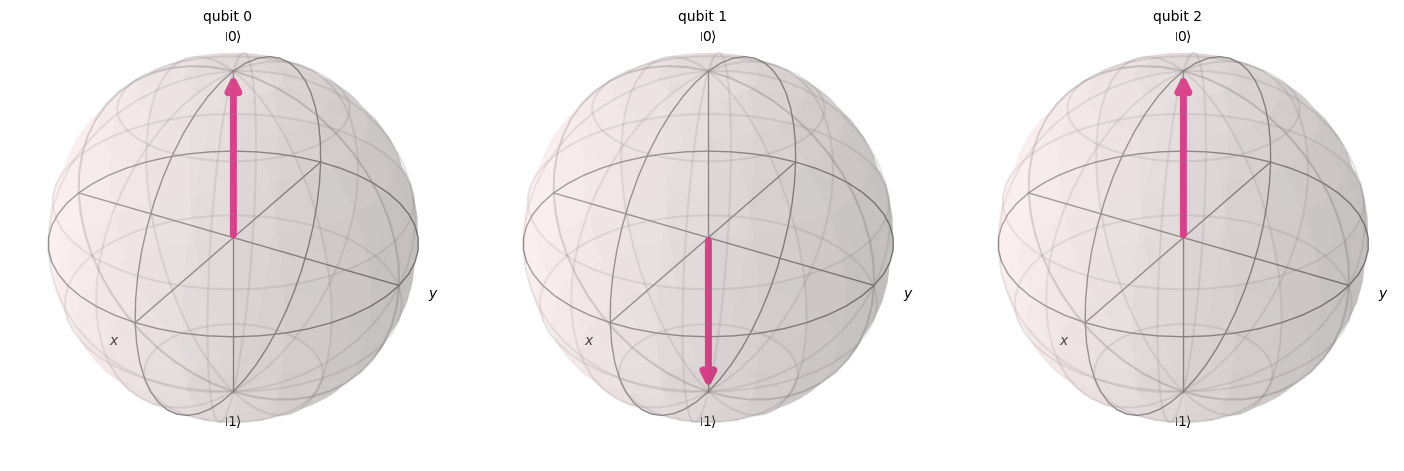

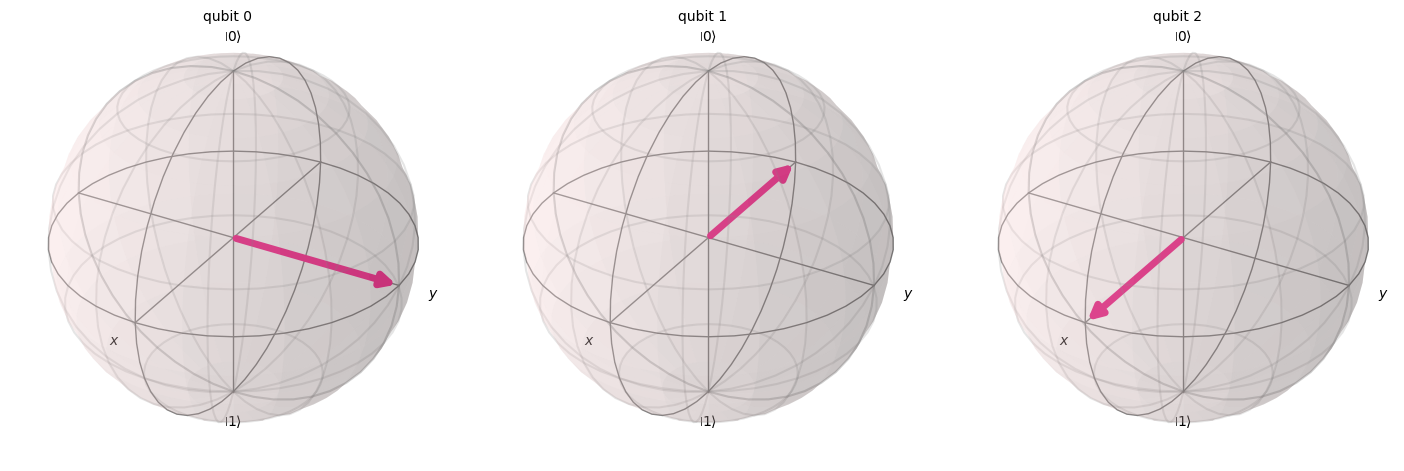

In [4]:
state = 2 # a basis state
psi = Statevector.from_int(state, 2**3) # 3 qubits
psi_qft = psi.evolve(QFT(3)) # 3 qubits QFT 

display(psi.draw('bloch'))
display(psi_qft.draw('bloch'))

$\ket{100} \xrightarrow{\text{QFT}} R_z(\frac{\pi}{2}) \otimes R_z(2\frac{\pi}{2})\otimes R_z(4\frac{\pi}{2}) \ket{+++}$

It first place all the states in the state $\ket{+}$. then, if the first rotate of $\alpha$, the second rotate of $2\alpha$ and the third rotates of $3\alpha$. 

If I compute the inverse QFT, than I can get all the basis stae with just one parameter $\alpha$

## Challenge code
 
 You must complete the qnode `model` that will be in charge of obtaining different outputs. This model depends on a single parameter and you must ensure that it generates all the basis states.
 You must also define the function `generate_coefficients`, which will return a list with the 8 values of the parameter to generate these basis states.
 
 ![img](images/example_sol.jpeg)

 ### Output
 
 To judge this challenge, the `generate_coefficients` function will be called first. With the output of this function (the eight coefficients), we will call the model to ensure that the generated states are the desired ones. In addition, we will check that:
 - The model is continuous (small modifications of the parameter imply small modifications of the generated state). By putting the parameter inside rotation gates you will have no problems with this. 
 
 
 - The generated coefficients are in the interval [0,10]. Solutions that do not fit this interval will be considered incorrect.
 
 In this challenge, we will not work with public and private tests. We will simply check that all of the above is fulfilled. Good luck!
 ### Imports
 The cell below specifies the libraries you should use in this challenge. Run the cell to import the libraries. ***Do not modify the cell.***

In [ ]:
import json
import pennylane as qml
from pennylane import numpy as np

### Code
 Complete the code below. Note that during QHack, some sections were not editable. We've marked those sections accordingly here, but you can still edit them if you wish.

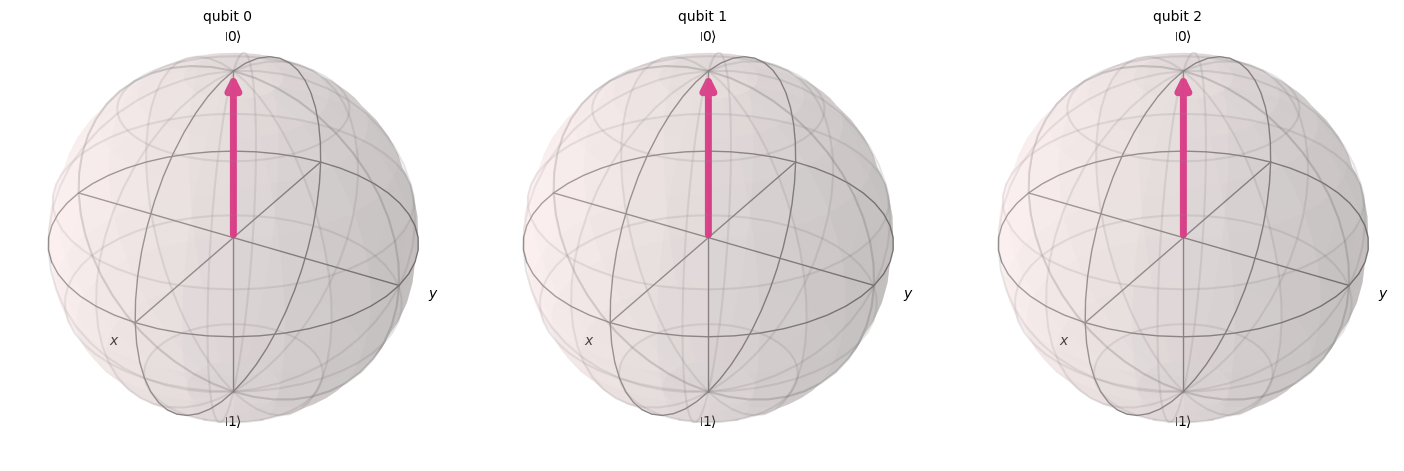

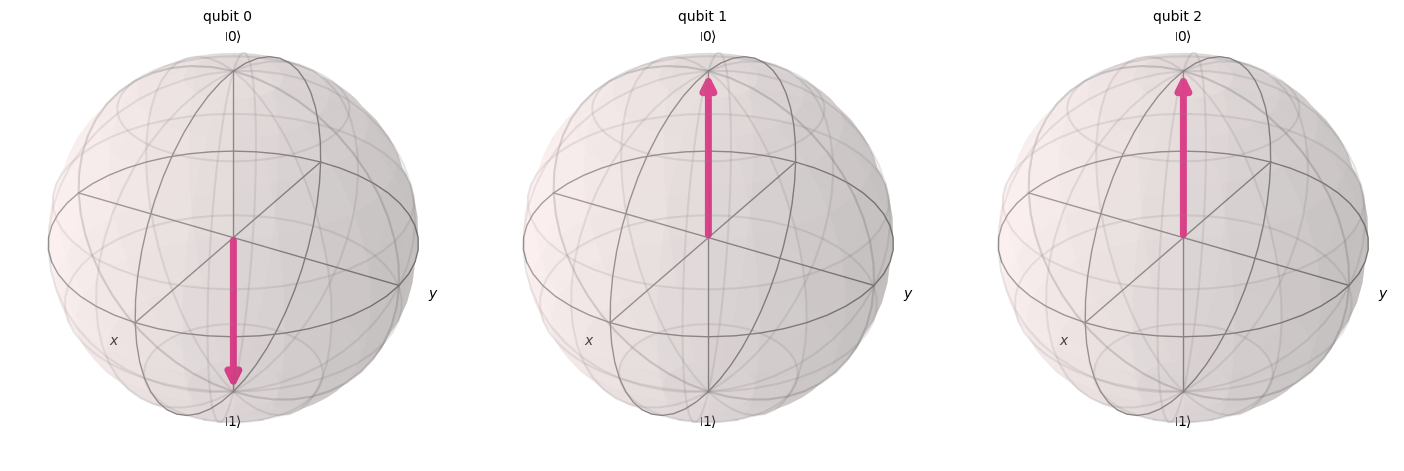

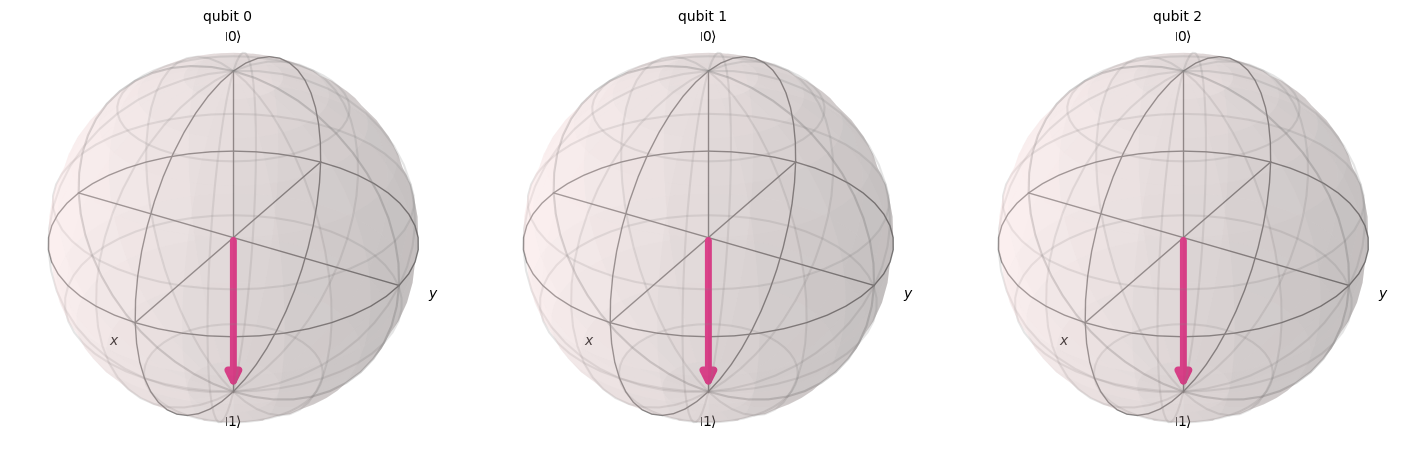

In [5]:
import json
import pennylane as qml
import pennylane.numpy as np
dev = qml.device("default.qubit", wires=3)

@qml.qnode(dev)
def model(alpha):
    qml.QFT(wires=range(3))
    # we could just use qml.Hadamard on all 3 qubits
    # initialize |+++>

    qml.RZ(4*alpha, wires=0)
    qml.RZ(2*alpha, wires=1)
    qml.RZ(alpha, wires=2)

    # inverse QFT. since QFT is unitary, we can just use ad-joint
    qml.adjoint(qml.QFT)(wires=range(3))

    return qml.state()

display(Statevector(model(0)).draw('bloch'))
display(Statevector(model(np.pi/4)).draw('bloch'))
display(Statevector(model(7*np.pi/4)).draw('bloch'))

In [6]:
# Uneditable section #
dev = qml.device("default.qubit", wires=3)
# End of uneditable section #

@qml.qnode(dev)
def model(alpha):
    """In this qnode you will define your model in such a way that there is a single 
    parameter alpha which returns each of the basic states.

    Args:
        alpha (float): The only parameter of the model.

    Returns:
        (numpy.tensor): The probability vector of the resulting quantum state.
    """
    # Put your code here #
    qml.QFT(wires=range(3))
    qml.RZ(4*alpha, wires=0)
    qml.RZ(2*alpha, wires=1)
    qml.RZ(alpha, wires=2)
    qml.adjoint(qml.QFT)(wires=range(3))
    return qml.probs(wires=range(3))

def generate_coefficients():
    """This function must return a list of 8 different values of the parameter that
    generate the states 000, 001, 010, ..., 111, respectively, with your ansatz.

    Returns:
        (list(int)): A list of eight real numbers.
    """
    # Put your code here #
    return [i*np.pi/4 for i in range(8)]

These functions are responsible for testing the solution. You will need to run the cell below. ***Do not modify the cell.***

In [7]:
def run(test_case_input: str) -> str:
    return None

def check(solution_output, expected_output: str) -> None:
    coefs = generate_coefficients()
    output = np.array([model(c) for c in coefs])
    epsilon = 0.001

    for i in range(len(coefs)):
        assert np.isclose(output[i][i], 1)

    def is_continuous(function, point):
        limit = calculate_limit(function, point)

        if limit is not None and sum(abs(limit - function(point))) < epsilon:
            return True
        else:
            return False

    def is_continuous_in_interval(function, interval):
        for point in interval:
            if not is_continuous(function, point):
                return False
        return True

    def calculate_limit(function, point):
        x_values = [point - epsilon, point, point + epsilon]
        y_values = [function(x) for x in x_values]
        average = sum(y_values) / len(y_values)

        return average

    assert is_continuous_in_interval(model, np.arange(0,10,0.001))

    for coef in coefs:
        assert coef >= 0 and coef <= 10

### Test cases
 Running the cell below will load the test cases. ***Do not modify the cell***.
 - input: No input
 	+ expected output: No output
 - input: No input
 	+ expected output: No output

In [8]:
test_cases = [['No input', 'No output'], ['No input', 'No output']]

### Solution testing
 Once you have run every cell above, including the one with your code, the cell below will test your solution. Run the cell. If you are correct for all of the test cases, it means your solutions is correct. Otherwise, you need to double check your work. ***Do not modify the cell below.***

In [9]:
for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")

Running test case 0 with input 'No input'...
Correct!
Running test case 1 with input 'No input'...
Correct!
